# Data Cleaning Core [Starter Notebook]



- Student Name: Joseph Lim

## The Data

You will be working with a modified version of the Titanitc dataset:

- [(Modified) Titanic Data](https://drive.google.com/file/d/1Uw7RzQMYSARCFnzJQqqNlZpUouXr16-8/view?usp=sharing)

- [Data Dictionary](https://docs.google.com/document/d/1uEeANvKURYmu-HUDGzbGlMmvAUwooatUg-gHUCDMh-Y/edit?usp=sharing)

___

- Save the files to your Course 1 > Week 2 > Data Folder.

This is one of the core (required) assignments for Coding Dojo's Data Science bootcamp. It is given during the second week of the first stack, and is intended to ease students into getting familiar with cleaning datasets utilizing Pandas/Python. In order to do so, students are asked to clean a modified version of the Titanic Dataset.

This starter notebook was created by Coding Dojo and modified by Joseph Lim.

Additionally, a data dictionary is provided below, constructed by Joseph Lim.

| Variable | Definition                                                               |
|----------|--------------------------------------------------------------------------|
| survival | If the passenger survived (0 = No, 1 = Yes)                              |
| pclass   | Ticket class of passenger (1 = 1st/Upper, 2 = 2nd/Middle, 3 = 3rd/Lower) |
| sex      | Sex of passenger                                                         |
| age      | Age of passenger in years(xx.5 if estimated, fractional if <1)           |
| sibsp    | # of siblings and/or spouses on board                                    |
| parch    | # of parents and/or children on board                                    |
| ticket   | ticket number                                                            |
| fare     | Fare passenger paid                                                      |
| cabin    | Cabin Number                                                             |
| embarked | Port passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton) |

## A) Load and Preview Data


- Mount google drive and navigate to the file on the Files sidebar.


In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).



- Navigate to the file on the Files side bar and copy the path
- Paste it below and save it as a variable called "fpath"

In [2]:
# Import required packages
import numpy as np
import pandas as pd

#Importing missingno
import missingno as msno

# Save the filepath and load the data as "df_titanic"
filepath = "/content/drive/MyDrive/Colab Notebooks/titanic_dirty.csv"
df_titanic = pd.read_csv(filepath)

In [3]:
# Display the first 5 rows
df_titanic.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,$7.25,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,$71.28,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,$7.93,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,$53.10,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,$8.05,NaN,S


In [4]:
# Display the last 5 rows
df_titanic.tail()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
901,622,623,1,3,"Nakid, Mr. Sahid",male,20.0,1,1,2653,$15.74,NaN,C
902,77,78,0,3,"Moutal, Mr. Rahamin Haim",male,NaN,0,0,374746,$8.05,NaN,S
903,715,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,$7.65,F G73,S
904,623,624,0,3,"Hansen, Mr. Henry Damsgaard",male,21.0,0,0,350029,$7.85,NaN,S
905,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,$23.45,NaN,S


- Display summary information (including dtypes, number of rows, number of columns).


In [5]:
# Display the info for the dataframe
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906 entries, 0 to 905
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   906 non-null    int64  
 1   PassengerId  906 non-null    int64  
 2   Survived     906 non-null    int64  
 3   Pclass       906 non-null    int64  
 4   Name         906 non-null    object 
 5   Sex          906 non-null    object 
 6   Age          723 non-null    float64
 7   SibSp        906 non-null    object 
 8   Parch        906 non-null    int64  
 9   Ticket       906 non-null    object 
 10  Fare         906 non-null    object 
 11  Cabin        207 non-null    object 
 12  Embarked     904 non-null    object 
dtypes: float64(1), int64(5), object(7)
memory usage: 92.1+ KB


**Scan the .info() to answer the following questions about the data:**

>Add your answers in this Markdown cell, right below each question:

**Q: A1) How many rows are there?**
- Your Answer:
  - There are 906 rows

**Q: A2) How many columns are there?**
- Your Answer:
  - There are 13 columns





**Q: A3)How many numeric columns?**
- Your Answer:
  - There are 6 numeric columns

**Q: A4) How many categorical/string columns are there (dtype='object')?**
- Your Answer:
  - There are 7 categorical/string columns


## B) Check Data Types and Convert (if required)


> Notice there are several columns with "object" datatype.

- **Use select_dtypes to view only the object columns**


In [6]:
# Use .select_dtypes to view only object columns
df_titanic.select_dtypes(include = "object")

,Name,Sex,SibSp,Ticket,Fare,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,1,A/5 21171,$7.25,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,PC 17599,$71.28,C85,C
2,"Heikkinen, Miss. Laina",female,0,STON/O2. 3101282,$7.93,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,113803,$53.10,C123,S
4,"Allen, Mr. William Henry",male,0,373450,$8.05,NaN,S
...,...,...,...,...,...,...,...
901,"Nakid, Mr. Sahid",male,1,2653,$15.74,NaN,C
902,"Moutal, Mr. Rahamin Haim",male,0,374746,$8.05,NaN,S
903,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,0,348124,$7.65,F G73,S
904,"Hansen, Mr. Henry Damsgaard",male,0,350029,$7.85,NaN,S


- Inspect the values in each column to confirm if they should be converted to numeric dtypes and answer the following questions:




**Q: B1) Which columns should be converted to a numeric dtype?**  (Hint: there are 2 columns that need to be converted)
- **Your Answer:**
  - "SibSp" should be converted, since that's a number of siblins and spouses
  - "Fare" should be converted, since that is numerical

    




### Convert Dtypes

#### Convert Fare

In [7]:
# Inspect the Fare column's value counts
df_titanic["Fare"].value_counts()

$8.05     45
$13.00    42
$7.90     38
$7.75     35
$26.00    31
          ..
$6.86      1
$12.65     1
$12.53     1
$12.00     1
$10.52     1
Name: Fare, Length: 234, dtype: int64



>In a Markdown cell below your displayed info, answer the following questions:

**Q: B2)  Do you see any values that are string characters that need to be replaced?**
- Your Answer:
  - Yes, the "$" should be removed.

**Q: B3) If so, do you need to replace a single part of a string (`df[col].str.replace`) or an entire value (`df[col].replace`)?**
- Your Answer:
  - Simply a single part of the string

**Perform the necessary steps to convert to numeric dtype:**

- 1) Replace/remove the non-numeric values.

In [8]:
# Remove  the "$" from fare column by replacing it with nothing
df_titanic["Fare"] = df_titanic["Fare"].str.replace("$", "")
# Check the .value_counts to confirm the change
df_titanic["Fare"].value_counts()

<ipython-input-8-4423d751d6b3>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_titanic["Fare"] = df_titanic["Fare"].str.replace("$", "")


8.05     45
13.00    42
7.90     38
7.75     35
26.00    31
         ..
6.86      1
12.65     1
12.53     1
12.00     1
10.52     1
Name: Fare, Length: 234, dtype: int64


- 2) Convert the column to a float dtype.

In [9]:
# Change the datatype of Fare column to float
df_titanic["Fare"] = df_titanic["Fare"].astype(float)
# Confirm the datatype
df_titanic["Fare"].dtypes

dtype('float64')

#### Convert SibSp

In [10]:
# Inspect the Sibsp column's value counts
df_titanic["SibSp"].value_counts()

0      618
1      212
2       27
4       18
3       16
8        7
5        5
one      3
Name: SibSp, dtype: int64

>In a Markdown cell below your displayed info, answer the following questions:

**Q: B3)  Do you see any values that are string characters that need to be replaced?**
- Your Answer:
  - Yes, the "one" value should be turned into a "1" value

**Q: B4) If so, do you need to replace a single part of a string (`df[col].str.replace`) or an entire value (`df[col].replace`)?**
- Your Answer:
  - An entire value needs to be replaced in this case.

**Perform the necessary steps to convert to numeric dtype:**

- 1) Replace/remove the non-numeric values.

In [11]:
# There are 3 values of "one" which should be replaced with "1"
df_titanic["SibSp"] = df_titanic["SibSp"].replace({"one": 1})
# Display the value counts again to confirm the change
df_titanic["SibSp"].value_counts()

0    618
1    212
2     27
4     18
3     16
8      7
5      5
1      3
Name: SibSp, dtype: int64


- 2) Convert the column to a float dtype.

In [12]:
# Convert the SibSp column to integer dtype
df_titanic["SibSp"] = df_titanic["SibSp"].astype(int)
# Confirm the datatype
df_titanic["SibSp"].dtypes

dtype('int64')

## C) Drop Unwanted Columns

- Drop the 'Unnamed: 0' column because it is an error

In [13]:
# Drop the Unnamed: 0 column
df_titanic = df_titanic.drop(columns = "Unnamed: 0")

# Display the .head to confirm the change
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.93,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


## D) Rename Columns
(that have Confusing/Abbreviated Column Names)

In the cell below:
- Rename the SibSp column as "Siblings or Spouses"
- Rename the Parch as "Parents or Children"

In [14]:
# Create a dictionary called rename_dict
# with current column names as keys
# and new replacement names as the values.
rename_dict = {"SibSp": "Siblings or Spouses",
               "Parch": "Parents or Children"}

In [15]:
# Use the rename_dict to change the column names in the dataframe
df_titanic = df_titanic.rename(rename_dict, axis = 1)
# Check the .head() to confirm the nams changed.
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Siblings or Spouses,Parents or Children,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.93,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


## E) Duplicate Rows

### Identifying Duplicates


- Use `df.duplicated` to identify if there are any duplicate rows in the data.


In [16]:
# Save a filter called "duplicated_rows" that identifies duplicated rows
duplicated_rows = df_titanic.duplicated()

# Get the sum of duplicated_rows filter to see the number of duplicate rows
duplicated_rows.sum()

15


**Q: E1) How many duplicate rows are in the data?**
- Your Answer:
  - There are 30 duplicate rows in the data

  
- Visualize all copies of the duplicate rows using df.duplicated(keep=False).
  - Sort the rows by the PassengerID column to view duplicate rows together.

In [17]:
# Save a new filter called "duplicated_rows_all" that identifies ALL
# of the duplicated rows (including the first). Hint: use the "keep" argument.
duplicated_rows_all = df_titanic.duplicated(keep = False)

# Calculate the sum of the duplicated_rows_all filter
duplicated_rows_all.sum()

30

In [18]:
# View all duplicated rows using your duplicated_rows_all filter
# Sort by PassengerId
df_titanic[duplicated_rows_all].sort_values(by = "PassengerId")

,PassengerId,Survived,Pclass,Name,Sex,Age,Siblings or Spouses,Parents or Children,Ticket,Fare,Cabin,Embarked
77,78,0,3,"Moutal, Mr. Rahamin Haim",male,NaN,0,0,374746,8.05,NaN,S
902,78,0,3,"Moutal, Mr. Rahamin Haim",male,NaN,0,0,374746,8.05,NaN,S
337,338,1,1,"Burns, Miss. Elizabeth Margaret",female,41.0,0,0,16966,134.50,E40,C
899,338,1,1,"Burns, Miss. Elizabeth Margaret",female,41.0,0,0,16966,134.50,E40,C
362,363,0,3,"Barbara, Mrs. (Catherine David)",female,45.0,0,1,2691,14.45,NaN,C
896,363,0,3,"Barbara, Mrs. (Catherine David)",female,45.0,0,1,2691,14.45,NaN,C
447,448,1,1,"Seward, Mr. Frederic Kimber",male,34.0,0,0,113794,26.55,NaN,S
892,448,1,1,"Seward, Mr. Frederic Kimber",male,34.0,0,0,113794,26.55,NaN,S
464,465,0,3,"Maisner, Mr. Simon",male,NaN,0,0,A/S 2816,8.05,NaN,S
898,465,0,3,"Maisner, Mr. Simon",male,NaN,0,0,A/S 2816,8.05,NaN,S


In [19]:
# Drop duplicates (but keep the first!)
df_titanic = df_titanic.drop_duplicates()
# Obtain the sum of duplicated to confirm all have been dropped
df_titanic.duplicated().sum()

0

## F) Unique Identifiers
- Find and Drop Columns with Unique Values for Every Row.

In [20]:
# Use .nunique() to get # of unique values for each column and save as a variable.
unique_values = df_titanic.nunique()

In [21]:
# Use the result to determine if any of the columns have 100% unique values.
unique_values/len(df_titanic) * 100

PassengerId            100.000000
Survived                 0.224467
Pclass                   0.336700
Name                   100.000000
Sex                      0.336700
Age                      9.876543
Siblings or Spouses      0.785634
Parents or Children      0.785634
Ticket                  76.430976
Fare                    26.262626
Cabin                   16.498316
Embarked                 0.448934
dtype: float64

**Q: F1) Which 2 features have 100% unique values in every row?**
- Your Answer:
  - Column 1: PassengerId
  - Column 2: Name




>Generally, a column that is NOT the index, and has a unique value for each row will not be helpful for analysis and should be dropped from the data.

- Inspect the two columns with 100% unique values:


In [22]:
# Slice the two columns with 100% unique values to view
df_titanic[["PassengerId", "Name"]]

,PassengerId,Name
0,1,"Braund, Mr. Owen Harris"
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,"Heikkinen, Miss. Laina"
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,5,"Allen, Mr. William Henry"
...,...,...
886,887,"Montvila, Rev. Juozas"
887,888,"Graham, Miss. Margaret Edith"
888,889,"Johnston, Miss. Catherine Helen ""Carrie"""
889,890,"Behr, Mr. Karl Howell"



- **Of the two columns with 100% unique values:**
  - Set the numeric column as the DataFrame's index.
  - Drop the string column from the DataFrame.


In [23]:
# Set the numeric column as the DataFrame's index.
df_titanic = df_titanic.set_index("PassengerId")
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings or Spouses,Parents or Children,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.93,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [24]:
# Drop the string column from the DataFrame.
df_titanic.drop(columns = "Name")

,Survived,Pclass,Sex,Age,Siblings or Spouses,Parents or Children,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.25,NaN,S
2,1,1,female,38.0,1,0,PC 17599,71.28,C85,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.93,NaN,S
4,1,1,female,35.0,1,0,113803,53.10,C123,S
5,0,3,male,35.0,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,211536,13.00,NaN,S
888,1,1,female,19.0,0,0,112053,30.00,B42,S
889,0,3,female,NaN,1,2,W./C. 6607,23.45,NaN,S


___

## G) Missing Values

In [25]:
# Get the number of null values for all columns and save as a variable
null_values = df_titanic.isna()

In [26]:
# Use this result to calculate the percentage of null values for each column.
null_values.sum()/len(df_titanic)*100

Survived                0.000000
Pclass                  0.000000
Name                    0.000000
Sex                     0.000000
Age                    19.865320
Siblings or Spouses     0.000000
Parents or Children     0.000000
Ticket                  0.000000
Fare                    0.000000
Cabin                  77.104377
Embarked                0.224467
dtype: float64

<Axes: >

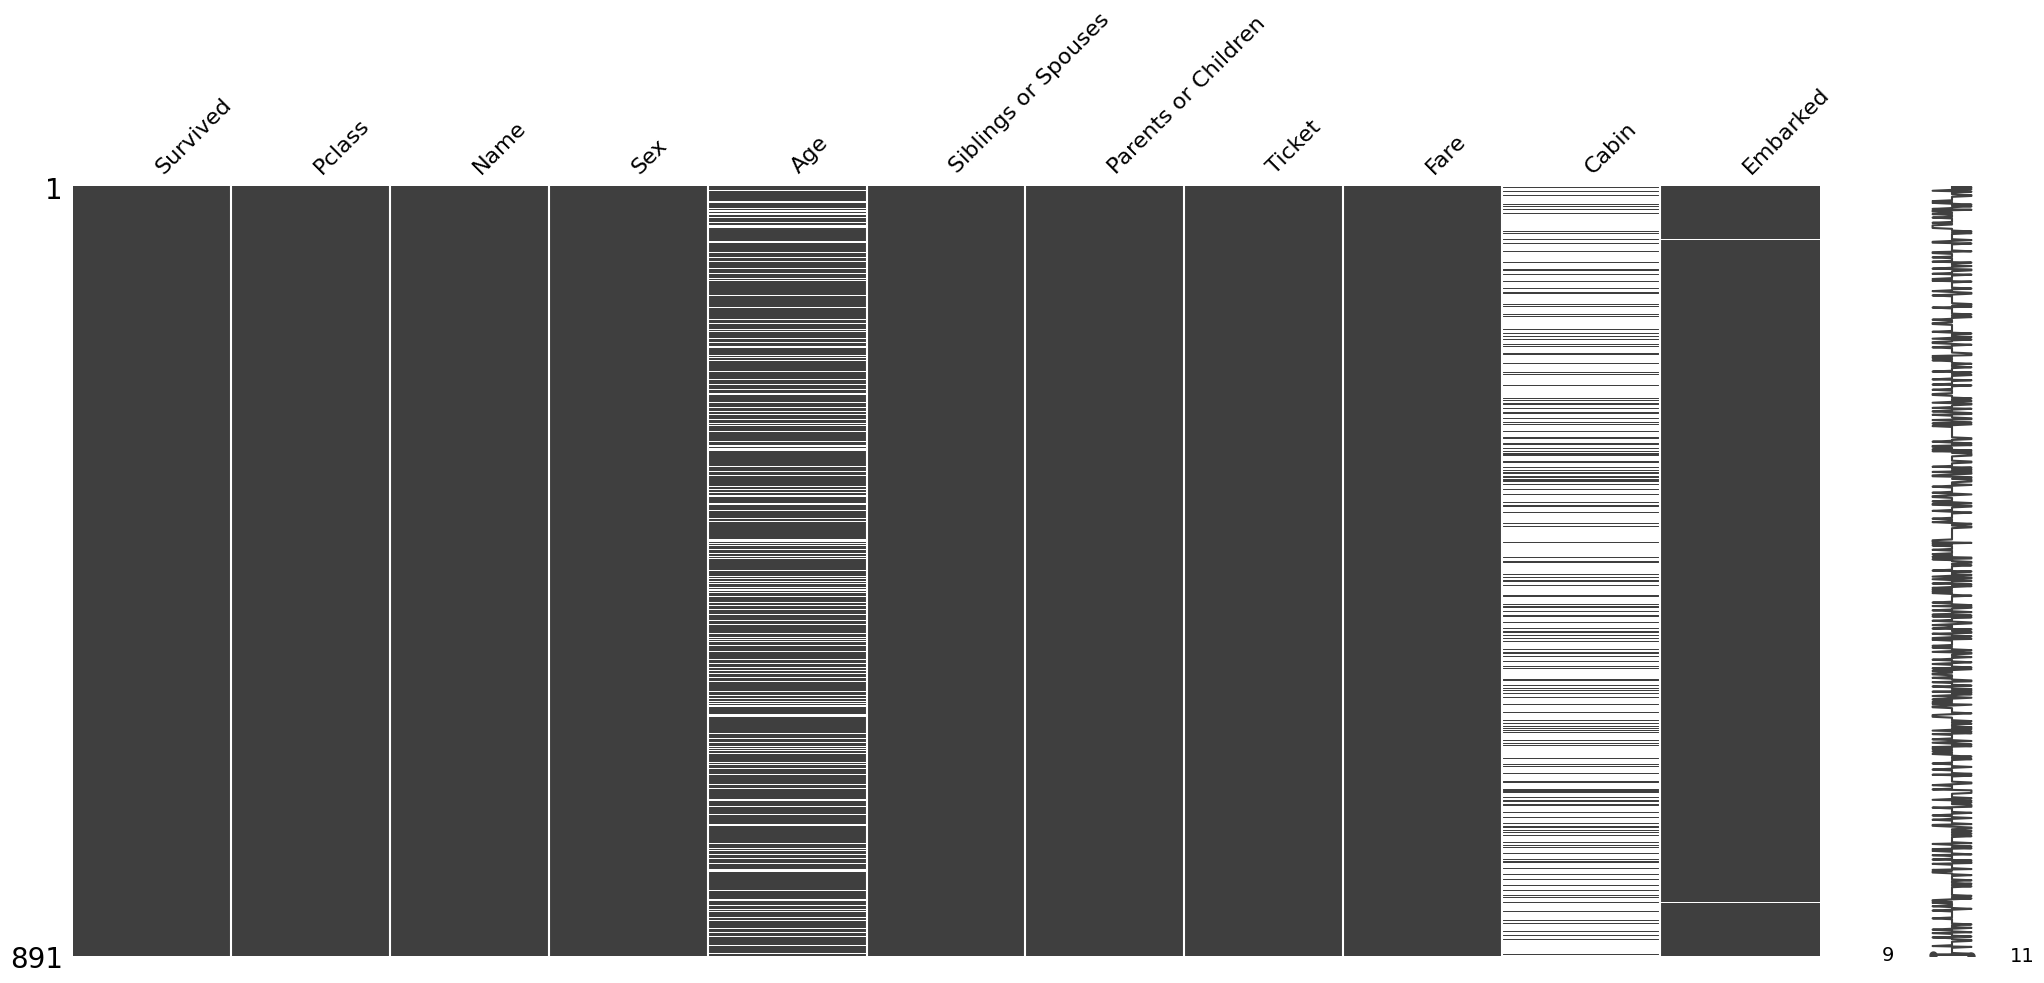

In [27]:
# Visualize the missing values using the missingno package's matrix plot.
msno.matrix(df_titanic)

#### Address the null values:

- Fill the null values in categorical columns with a placeholder category called MISSING.


In [28]:
# save list of categorical column name. (Hint: select_dtypes)
cat_columns = df_titanic.select_dtypes(include = "object").columns
cat_columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [29]:
# use the list of cat columns to fill null values with MISSING
df_titanic[cat_columns] = df_titanic[cat_columns].fillna("MISSING")


- Fill the null values in numeric columns with a placeholder value of -1



In [30]:
# save list of numeric column names (Hint: select_dtypes)
num_columns = df_titanic.select_dtypes(include = "number").columns
num_columns

Index(['Survived', 'Pclass', 'Age', 'Siblings or Spouses',
       'Parents or Children', 'Fare'],
      dtype='object')

In [31]:
# use the list of num columns to fill null values with -1
df_titanic[num_columns] = df_titanic[num_columns].fillna(-1)

- Use either missingno's matrix plot or Pandas to confirm that there are 0 null values remaining.


In [32]:
# Confirm no more nulls using Pandas
df_titanic.isna().sum()

Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                    0
Siblings or Spouses    0
Parents or Children    0
Ticket                 0
Fare                   0
Cabin                  0
Embarked               0
dtype: int64

<Axes: >

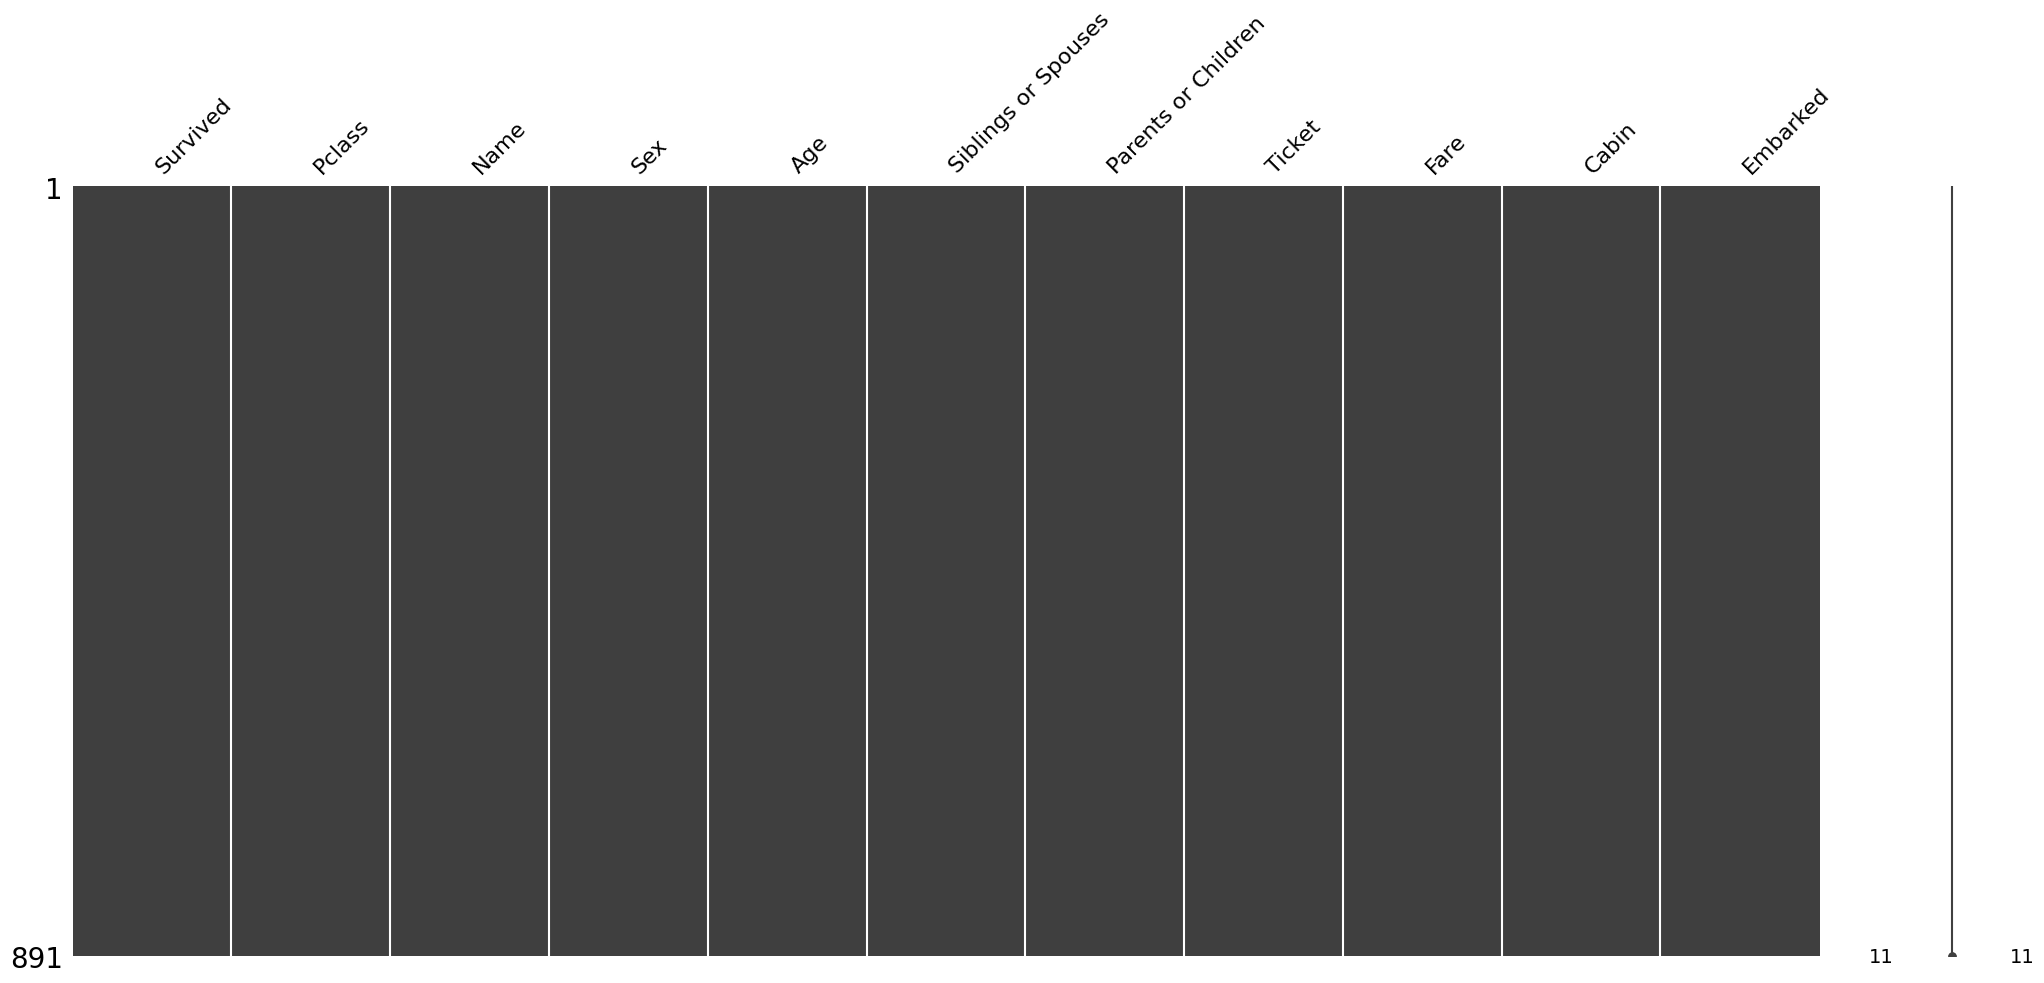

In [33]:
# Confirm no more nulls using using missingno
msno.matrix(df_titanic)

## H) Consistent Values

- Check each string column's value counts for inconsistent values.
  - E.g. "Cat" vs "cat", "Y" vs. "Yes"



- Fix/replace the inconsistent values with the values you believe are correct.


- Display the value_counts again to confirm the values are now consistent.
  

In [34]:
# Save a list of object columns (Hint: select_dtypes)
cat_columns = df_titanic.select_dtypes(include = "object").columns
cat_columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [35]:
# Check the nunique for just the object cols
df_titanic[cat_columns].nunique()

Name        891
Sex           3
Ticket      681
Cabin       148
Embarked      5
dtype: int64

- Note that out of the 4 categorical columns remaining:
  - 2 columns have a small number of categories  (Sex and Embarked)
  - 2 columns have over 100 categories (Ticket and Cabin).

- We do not want to keep categorical features with so many categories.


- **Drop the Ticket column and Cabin column.**

In [36]:
# Drop the columns listed above
columns_to_drop = ["Ticket", "Cabin"]
df_titanic = df_titanic.drop(columns = columns_to_drop)

df_titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings or Spouses,Parents or Children,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.25,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.28,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.93,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.10,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.05,S


### For Each Remaining Categorical Column:

- Display the value counts for the column
- Take a note of any values that are not consistent.
- Remove/fix the inconsistent values
- Confirm by checking the value counts again

In [37]:
# Remake the list of string columns (after dropping previous cols)
cat_columns = df_titanic.select_dtypes(include = "object").columns
cat_columns
# loop through the list of string columns
for column in cat_columns:
  # print the value counts for the column
  print(df_titanic[column].value_counts())
  # Print an empty line for readability
  print("")

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

male      574
female    313
F           4
Name: Sex, dtype: int64

S             644
C             168
Q              75
MISSING         2
Queenstown      2
Name: Embarked, dtype: int64



**Q: H1) Which columns have inconsistent values that need to be addressed?**
- Your Answer:
  - The "Sex" column should have male/female, not male/female/F"
  - The "Embarked" column should have S/C/Q/Missing, not S/C/Q/Missing/Queenstown

### Checking & Fixing Consistency: Column 1

In [38]:
# Check for inconsistencies by inspecting the value_counts for Embarked
df_titanic["Embarked"].value_counts()

S             644
C             168
Q              75
MISSING         2
Queenstown      2
Name: Embarked, dtype: int64

In [39]:
# Replace "Queenstown" with "Q"
df_titanic["Embarked"] = df_titanic["Embarked"].replace("Queenstown", "Q")
# Check the value counts again to confirm
df_titanic["Embarked"].value_counts()

S          644
C          168
Q           77
MISSING      2
Name: Embarked, dtype: int64

### Checking and Fixing Consistency: Column 2

In [40]:
# # Check for inconsistencies by inspecting the values_counts for Sex
df_titanic["Sex"].value_counts()

male      574
female    313
F           4
Name: Sex, dtype: int64

In [41]:
# Replace "F" with "female"
df_titanic["Sex"] = df_titanic["Sex"].replace("F", "female")

# Check the value counts again to confirm
df_titanic["Sex"].value_counts()

male      574
female    317
Name: Sex, dtype: int64

## I) Save the Final DataFrame to Csv

- Save the cleaned DataFrame to your Google Drive in the CodingDojo>  01-Fundamentals> Week02>Data folder.
  - Name the file "data-cleaning-core.csv"


In [42]:
# Save the folder + filename as a variable called fpath
folder = "/content/drive/MyDrive/Colab Notebooks/"
filename = "data-cleaning-core.csv"

fpath = folder + filename

# Use to_csv to save the dataframe using the filename
df_titanic.to_csv(fpath)

- Confirm the data was saved correctly.

In [43]:
# Read in your new .csv file with Pandas.
df = pd.read_csv(fpath)
# Display the info summary.
df.info()
# Display the first 5 rows.
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          891 non-null    int64  
 1   Survived             891 non-null    int64  
 2   Pclass               891 non-null    int64  
 3   Name                 891 non-null    object 
 4   Sex                  891 non-null    object 
 5   Age                  891 non-null    float64
 6   Siblings or Spouses  891 non-null    int64  
 7   Parents or Children  891 non-null    int64  
 8   Fare                 891 non-null    float64
 9   Embarked             891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,Siblings or Spouses,Parents or Children,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.25,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.28,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.93,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.10,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.05,S


### Save and Submit your work

When the assignment is complete, download your notebook as a .ipynb file and submit it on the learning platform.  